### Равномерное распределение

In [1]:
import numpy as np
from scipy.stats import randint

# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)

In [2]:
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [3]:
# Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого вероятность того, 
# что случайная величина примет значение или меньше:

# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


Теперь давайте попробуем с помощью функций Python решить другую задачу.

Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [4]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


В результате получаем  — это вероятность того, что выигрыш получит кто-то, чей порядковый номер — от 1 до 50. Разумеется, вероятность не зависит от самого номера, поэтому для номеров с 51 по 100 вероятность будет ровно такая же.

### Распределение Бернулли

Распределение Бернулли, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями  и  соответственно. Таким образом, распределение Бернулли описывает события, имеющие ровно два исхода. Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).

Давайте разберём задачу на применение этого распределения ↓

Вы стреляете по мишени в тире. Вероятность попасть составляет 0.6. В случае успеха вы выиграете плюшевого медведя стоимостью 3000 рублей, а в случае промаха — не выиграете ничего. У вас есть только один выстрел.

Какой должна быть стоимость билета, чтобы игра была честной, то есть чтобы цена билета равнялась ожидаемому выигрышу, а значит, не уводила в убыток продавца или вас при большом количестве выстрелов?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


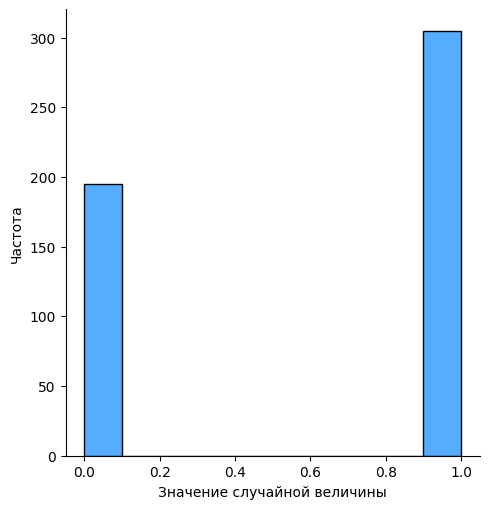

In [5]:
# С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, 
# например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [6]:
# Также можно вывести количество неудач и попаданий в нашей модели:

unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 195]
 [  1 305]]


### БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Повторение нескольких независимых испытаний Бернулли называется процессом Бернулли. Результаты процесса Бернулли в свою очередь будут следовать биномиальному распределению.

Биномиальным называют распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

In [8]:
# Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.
# Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

Получаем, что с вероятностью 0.678 будет производиться не более двух бракованных изделий в день.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


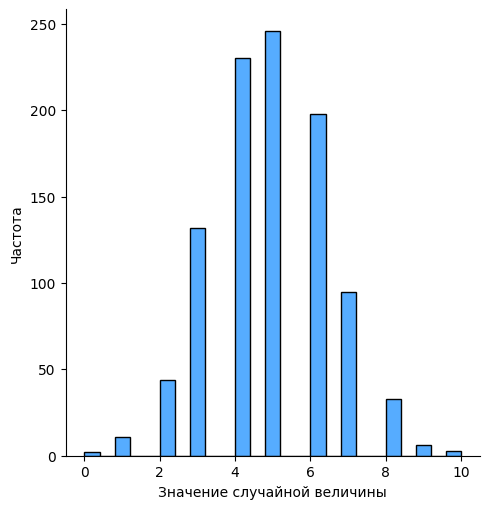

In [9]:
# Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и 
# получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, 
# равным 10, и реализовать 1000 попыток:

from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Можно видеть, что чаще всего можно наблюдать пять успешных исходов.

### РАСПРЕДЕЛЕНИЕ ПУАССОНА

Распределение Пуассона — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

Допустим, у нас есть ресторан быстрого питания, в который приходят  в среднем Три посетителя в минуту. Однако это всего лишь средний показатель — фактический показатель может варьироваться.

Распределение Пуассона можно использовать для анализа вероятности различных событий, касающихся того, сколько клиентов придёт в ресторан. С его помощью можно рассчитать вероятность затишья (когда в течение какого-то периода времени не будет ни одного клиента), а также вероятность всплеска активности (когда в ресторан за минуту придут пять и более клиентов). Эта информация, в свою очередь, может помочь менеджеру спланировать рабочую нагрузку и график сотрудников, а также план по закупкам продуктов.

Кроме использования в планировании нагрузки на персонал и производство, распределение Пуассона также используется в биологии (обнаружение мутаций), финансах (прогнозирование количества заявлений о банкротстве или просрочек кредитов), информационной безопасности (предсказание количества вирусных атак) и любой другой ситуации, в которой события зависят от времени.
В распределении Пуассона значение случайной величины может быть любым неотрицательным числом.  

Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вероятность попадания вызова на удержание была не более 0.1?

In [10]:
# Например, для пяти операторов мы бы получили следующее выражение:

import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


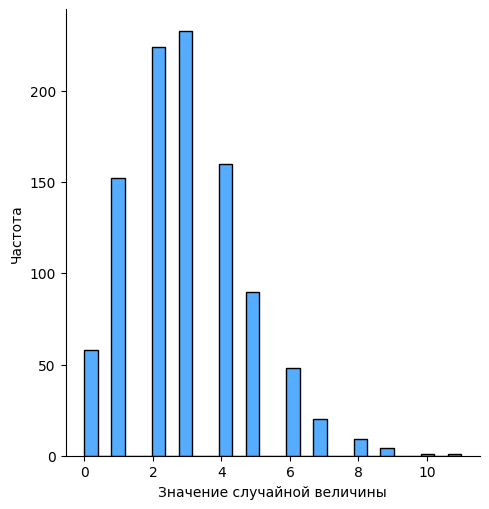

In [11]:
#Также можно смоделировать распределение Пуассона. 
# Например, будем рассматривать 1000 реализаций случайной величины, у которой лямбда = 3:
from numpy import random
import seaborn as sns

data = random.poisson(lam=3, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

In [15]:
# Пассажиры прибывают на вокзал со средней скоростью лямбда =4 человека в минуту.

# Если количество пассажиров, приезжающих на вокзал, подчиняется распределению Пуассона, 
# какова приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период? 

scipy.stats.distributions.poisson.pmf(16, 16)

0.09921753162215541

### Непрерывное равномерное распределение

Мы можем с помощью Python смоделировать случайную величину c таким распределением и визуализировать плотность её распределения. К примеру, сформируем выборку объёмом 10000 для распределения с параметрами a=10 и b=40:

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


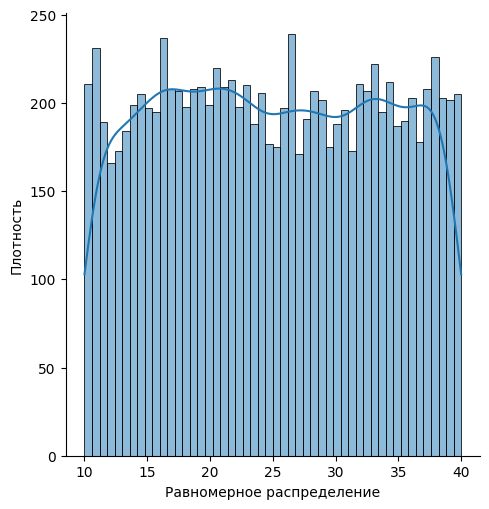

In [16]:
from scipy.stats import uniform
import seaborn as sns

data = uniform.rvs(size=10000, loc=10, scale=30)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

По графику плотности распределения видно, что в рамках интересующего нас интервала все значения сгенерированы примерно с одной частотой. Разумеется, есть некоторые колебания, но с реальными данными у вас всегда будет получаться именно такая картина, отличная от идеального теоретического предположения.

### НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Нормальное распределение (его ещё называют гауссовским или распределением Гаусса) представляет собой распределение вероятностей, обычно используемое для моделирования таких явлений, как физические характеристики (например, рост, вес и т. д.) или результаты тестирований.

Кроме того, что по нормальному закону распределены многие величины, нормальное распределение очень часто используется в статистике и машинном обучении, чтобы проверить корректность построенной в модели. К примеру, вы уже отлично умеете решать задачу регрессии и, конечно же, знаете, что такое остатки (или их ещё называют отклонениями или ошибками) — разница между реальными и предсказанными значениями. Оказывается, чтобы убедиться, что модель корректная, необходимо собрать все эти остатки и проверить, распределены ли они по нормальному закону. Это можно сделать и визуально — форма нормального распределения легко узнаваема. Видно, что у данного распределения очень большая плотность около середины и намного меньше — у краёв. Если бы мы построили график для остатков в модели линейной регрессии и получили такой результат, мы могли бы сделать вывод, что с точки зрения этого критерия модель построена корректно. В целом, с физическими характеристиками в жизни всё работает ровно так же: например, много людей среднего роста, мало очень высоких или очень низких.

В математике считается, что если мы возьмём много разных случайных величин, которые являются независимыми (или слабо зависимыми друг от друга), то они образуют нормальное распределение. Это утверждение называется центральной предельной теоремой (ЦПТ).

Центральная предельная теорема является буквально сердцем статистики, а также всей концепции проверки статистических гипотез. Именно благодаря ей мы имеем возможность реализовывать различные статистические критерии, например проводить A/B-тесты, с помощью которых можно оценить, правда ли один рекламный ролик эффективнее, чем другой, или выявить, какой интерфейс интернет-магазина больше стимулирует людей к покупкам.

Во многом именно благодаря этой теореме нормальные распределения являются подходящей аппроксимацией, даже если известно, что основное распределение не является нормальным.

Это удобно, так как с помощью нормального распределения легко получить вероятностные оценки.

Существует эмпирическое правило трёх сигм, которое гласит:
- Если отступить от среднего на одно стандартное отклонение в меньшую и большую сторону, то в этих пределах будет 68 % данных.
- Если отступить от среднего на два стандартных отклонения в меньшую и большую сторону, то в этих пределах будет 95 % данных.
- Если отступить от среднего на три стандартных отклонения в меньшую и большую сторону, то в этих пределах будет 99.7% данных.

Это знание даёт нам много полезной информации. К примеру, мы знаем, что по результатам работы сотрудников колл-центра среднее количество продаж составило 100, а стандартное отклонение — 10. Исходя из этих данных, мы моментально можем вычислить, что это значит, что 68 % персонала смогли сделать от 90 до 110 продаж, 95 % — от 80 до 120, а 99.7 % — от 70 до 130. Здесь мы понимаем, что если кто-то смог реализовать не более 70 продаж, то он явно справляется с обязанностями гораздо хуже, чем его коллеги. Если есть те, у кого более 130 продаж, — это самые ценные сотрудники, и их стоит поощрить бонусами.

Кроме того, нормальное распределение обладает рядом сильно упрощающих жизнь характеристик, многие из которых можно наблюдать на приведённом выше графике: он симметричный и «одновершинный», что означает, что его среднее значение, медиана и мода равны, то есть можно сделать вычисления для одной меры и получить сразу три.

Также очень важно иметь представление о нормальном распределении, так как многие статистические критерии (например, те, которые используются для A/B-тестов) могут быть реализованы только для нормально распределённых данных.

Давайте смоделируем нормальное распределение с математическим ожиданием, равным , и стандартным отклонением, равным , и посмотрим, какой вид оно примет.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


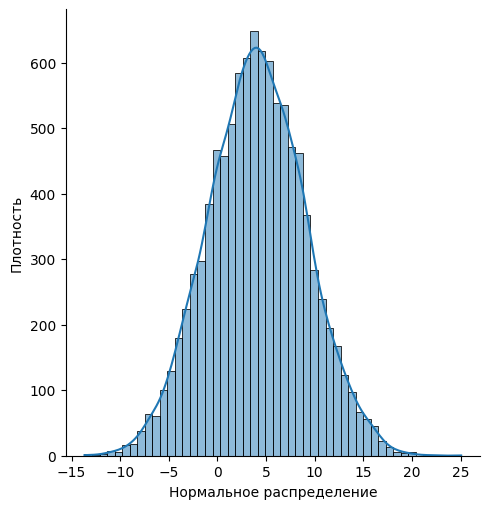

In [17]:
from scipy.stats import norm
import seaborn as sns

data = norm.rvs(size=10000, loc=4, scale=5)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')

Мы видим, что распределение не выстраивается в идеально гладкий «колокол», но очень близко к этой форме.

→ Когда вы в будущем будете реализовывать статистические тесты, для которых необходимо соответствие нормальному распределению, вы сможете подобным образом оценивать форму распределения для ваших данных.

Среди всех нормальных распределений выделяют одно особенное — стандартное нормальное. У него нулевое среднее и единичная дисперсия.

Это своего рода эталон нормальных распределений.

Для нас представляет интерес переход от произвольного нормального распределения к стандартному.

Если у нас есть нормальное распределение, то, чтобы свести его стандартному, необходимо из каждого значения вычесть среднее и разделить на стандартное отклонение.

Чем это может быть полезно? Допустим, нам нужно сравнить результаты тестирования двух групп студентов, которые сдавали разные экзамены на знание английского языка, TOEFL и IELTS. Первый экзамен оценивается по шкале от 0 до 120, а второй — от 0 до 9. Как сравнить результаты, измеренные в разных единицах, между собой? Здесь нам и помогает стандартизированное распределение. Если мы переведём оценки обеих групп студентов в так называемые -оценки, то сможем сравнить результаты между группами. 

Такая стандартизация используется также в машинном обучении, чтобы привести признаки к одной шкале измерения — это сильно повышает качество моделей. Вы уже сталкивались с подобной процедурой, когда делали шкалирование признаков.

С помощью Python мы можем стандартизировать данные следующим образом:

In [18]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


### ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Экспоненциальное распределение — это распределение вероятностей времени между событиями в процессе Пуассона.

Как вы помните, в процессе Пуассона нам известно, сколько событий происходит за какой-то промежуток времени.

В реальной жизни интервалы времени между событиями обычно разные. Например, если мы анализируем количество поступающих на рабочую почту писем, то оно может быть разным в зависимости от дня и времени суток. Но если мы возьмём небольшой временной интервал, в течение которого скорость примерно постоянная, например с 10:30 до 14:30 в понедельник, экспоненциальное распределение можно использовать как хорошую приблизительную модель для времени до поступления следующего письма.

Значениями случайной величины, распределённой по экспоненциальному закону, являются любые вещественные неотрицательные числа.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


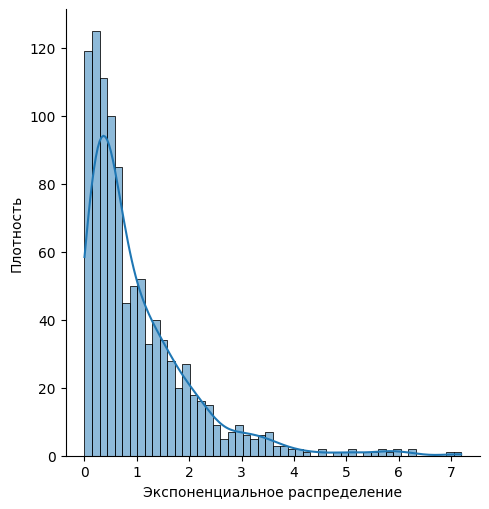

In [19]:
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(scale=1, loc=0, size=1000)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')

# Деревья решений

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

# Примечание. 
# Для более понятной визуализации перед построением дерева уберём из датасета объекты с Lot_Frontage > 150 и с Lot_Area > 20000.

# Создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']

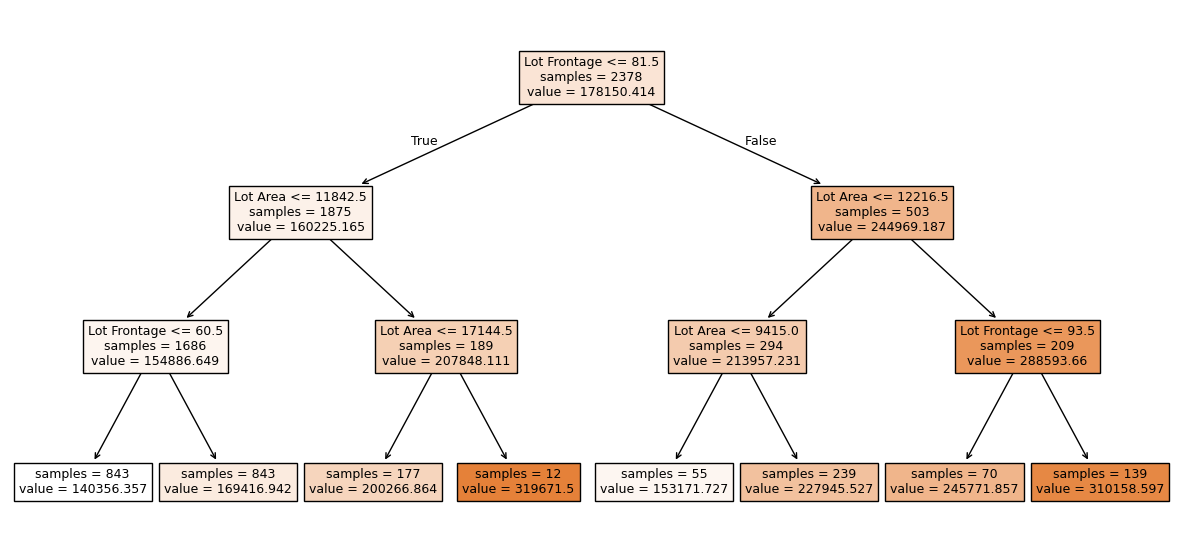

In [21]:
# Создадим модель дерева решений для задачи регрессии с максимальной глубиной 3 и обучим её. 
# Напомним, что в sklearn за реализацию дерева решений для задачи регрессии отвечает класс DecisionTreeRegressor из модуля tree.

# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

# Отследить, как дерево решений строит свой прогноз, нам может помочь граф обученного дерева решений. 
# Напомним, что за его визуализацию в библиотеке sklearn отвечает функция plot_tree() из модуля tree.

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

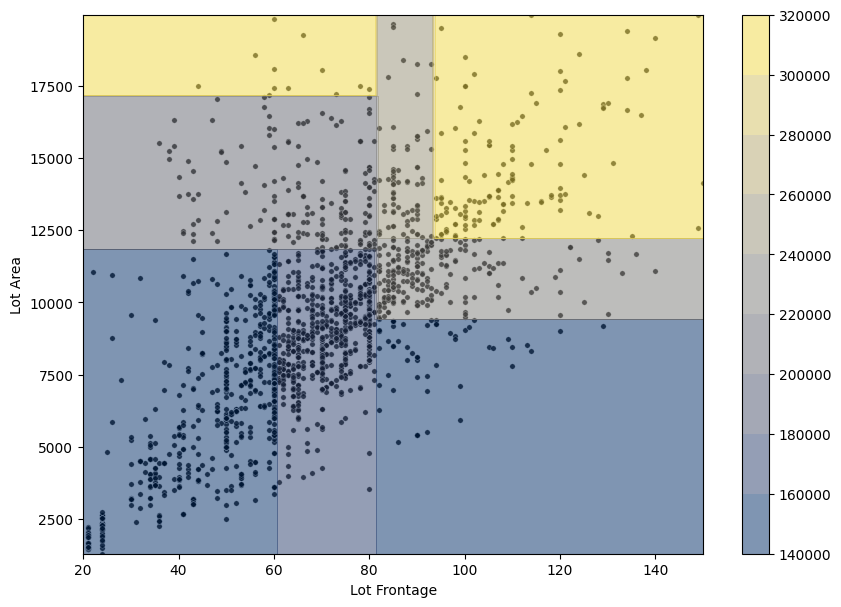

In [22]:
# Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. 
# Для этого шага мы реализовали функцию plot_decision_bound_regression():

def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

#### Давайте посмотрим на пример разделяющей поверхности дерева решений в случае задачи классификации ↓

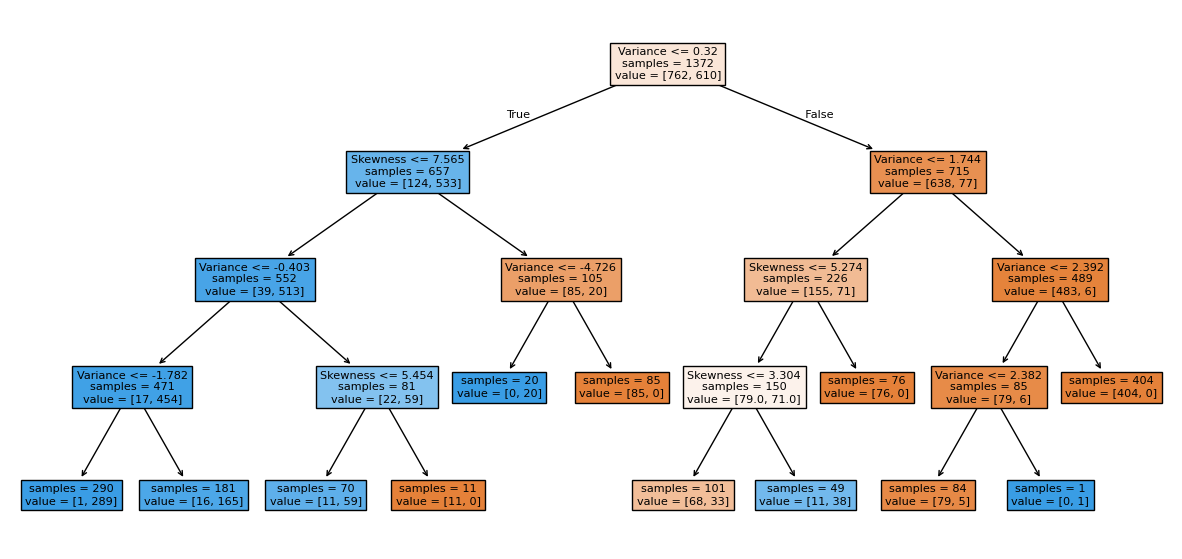

In [23]:
# Как обычно, подготовим обучающую выборку, отделив факторы X и целевую переменную y:

# Создаём обучающую выборку    
bill_data = pd.read_csv('data/bill_authentication.csv')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']

# Создадим модель дерева решений для задачи классификации (класс DecisionTreeClassifier из модуля tree библиотеки sklearn) 
# с максимальной глубиной 4 и обучим её.

# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

# Отследить то, как дерево решений строит свой прогноз, нам может помочь граф обученного дерева решений:

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

В результате построения дерева было образовано 12 областей (), каждая из которых соответствует одному из 12 листьев. В каждой из областей была рассчитана оценка вероятности принадлежности к каждому из классов — . Класс объекта  определяется как класс с максимальной из этих вероятностей.

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию plot_decision_bound_classification():


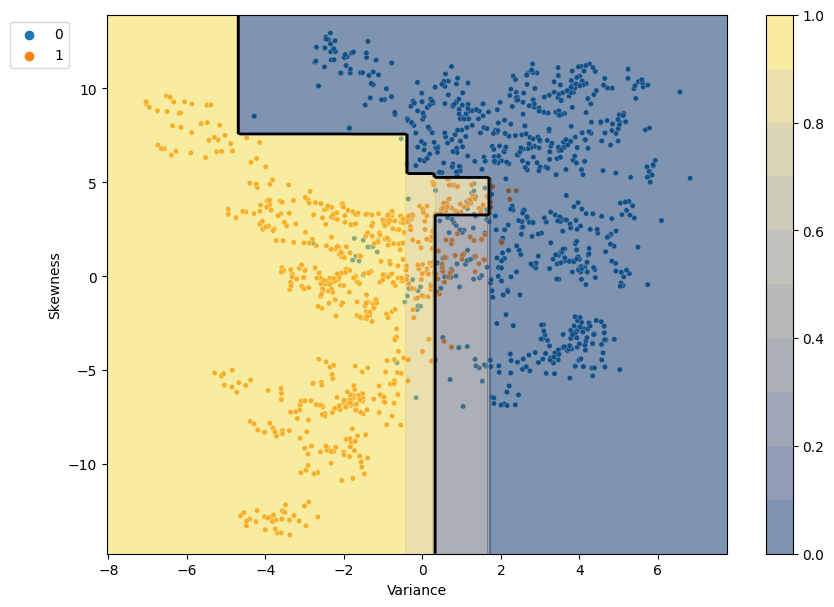

In [24]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)

### 7. Деревья решений: практика

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [27]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [28]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [29]:
# Итак, все признаки, за исключением целевого, кодируются числовым форматом. 
# Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке sklearn, поэтому кодирование категориальных признаков нам не потребуется.

# Заодно проверим данные на наличие пропусков:

voice_data.isnull().sum().sum()

0

Общее количество пропусков в датасете равно 0. Значит, обработка пропущенных значений нам не потребуется.

→ При желании вы можете провести разведывательный анализ и изучить взаимосвязи между признаками, описывающими голос на аудиозаписи, и целевой переменной, чтобы предварительно определить наиболее значимые признаки и их влияние.

Мы же пропустим этот шаг и перейдём к формированию обучающей и тестовой выборок. Разделим датасет на две части в соотношении 80/20:

In [30]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1097, 2)
Test shape: (275, 2)


In [32]:
# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy' #критерий информативности
)
dt.fit(X_train, y_train)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
#tree_graph = tree.plot_tree(
#    decision_tree=dt, #дерево
#    feature_names=X.columns, #имена факторов
#    proportion=True, #выводить ли количество данных в пропорциях
#    filled=True, #расцветка
#    class_names=dt.classes_, #имена классов
#);
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Accuracy: 0.829


<Figure size 1500x700 with 0 Axes>

In [ ]:
# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=42
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, #дерево
    feature_names=X.columns, #имена факторов
    proportion=True, #выводить ли количество данных в пропорциях
    filled=True, #расцветка
    class_names=dt.classes_, #имена классов
);
# Делаем предсказание
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на тестовой выборке
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

In [34]:
# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
print('Depth: {}'.format(dt.get_depth()))
print('Count of leaves: {}'.format(dt.get_n_leaves()))
# Делаем предсказание
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Depth: 13
Count of leaves: 66
Train accuracy: 1.000
Test accuracy: 0.938


In [35]:
# Задаем сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

# Задаем метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Инициализируем поиск на сетке и обучаем его
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0), #модель
    param_grid=param_grid, #сетка параметров
    scoring='accuracy', #метрика
    cv=cv, #кросс-валидатор
    n_jobs=-1 #используем все мощности процессора
)
gs.fit(X_train, y_train)
print(gs.best_params_)
# Определяем наилучшую модель
best_tree = gs.best_estimator_

# Делаем предсказание
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)
# Считаем метрику accuracy на обучающей и тестовой выборках
print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}
Train accuracy: 0.985
Test accuracy: 0.916


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


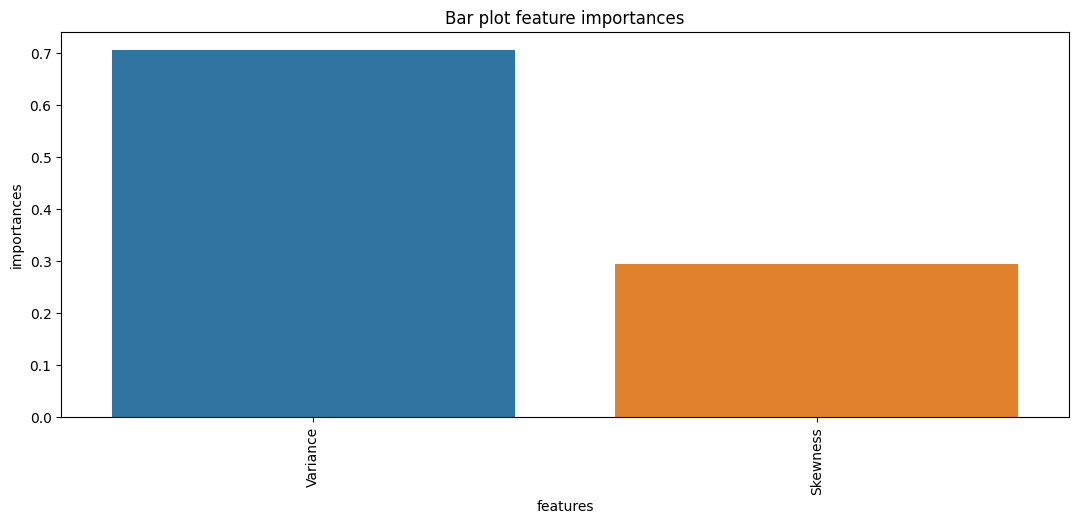

In [36]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_tree.feature_importances_ #важность признаков
# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)
# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)